In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='Microsoft JhengHei' #顯示中文
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",30) #設定pandas最多顯示出30個欄位資訊

df = pd.read_csv('f_lvr_land_a.csv', encoding='utf8') #新北實價登錄, 下載的檔案用筆記本另存 csv, 編碼選 utf-8

df.sample(3) #隨機前3筆

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
995,新店區,房地(土地+建物)+車位,新北市新店區安祥路156巷31~60號,164.28,NaN,山坡地保育區,丙種建築用地,1070326,土地10建物2車位1,五層,六層,華廈(10層含以下有電梯),見其他登記事項,鋼筋混凝土造,1070606,189.18,3,2,2,有,有,13220000,75655,坡道平面,36.91,1700000,NaN,RPOPMLRJKINFFCF28CA
834,林口區,房地(土地+建物)+車位,新北市林口區麗園一街1~30號,44.13,住,NaN,NaN,1071027,土地1建物1車位1,九層,十六層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,0840411,174.29000000000002,3,2,2,有,有,9100000,52215,坡道平面,0.0,0,NaN,RPQNMLMKKINFFBF77CA
1317,淡水區,房地(土地+建物),新北市淡水區中山北路一段207巷61~90號,30.13,住,NaN,NaN,1071022,土地1建物1車位0,四層,五層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,0780126,115.33000000000001,3,2,2,有,無,5200000,45088,NaN,0.0,0,NaN,RPQOMLOJKINFFEF28CA


In [2]:
df2 = df[['鄉鎮市區','交易標的','土地區段位置建物區段門牌','土地移轉總面積平方公尺','都市土地使用分區',
          '非都市土地使用分區','非都市土地使用編定','交易年月日','交易筆棟數','移轉層次','總樓層數',
          '建物型態','主要用途','主要建材','建築完成年月','建物移轉總面積平方公尺','建物現況格局-房',
          '建物現況格局-廳','建物現況格局-衛','建物現況格局-隔間','有無管理組織','總價元','單價元平方公尺',
          '車位類別','車位移轉總面積平方公尺','車位總價元','備註','編號'
        ]]
df2.head(3) #看前3行資料


,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,total floor number,building state,main use,main building materials,construction to complete the years,building shifting total area,Building present situation pattern - room,building present situation pattern - hall,building present situation pattern - health,building present situation pattern - compartme...,Whether there is manages the organization,total price Yuan,the unit price a Yuan square meter,the berth category,berth shifting total area square meter,the berth total price Yuan,the note,serial number
1,土城區,房地(土地+建物),新北市土城區裕生路83巷1~30號,21.28,住,NaN,NaN,1071107,土地2建物1車位0,四層，陽台,五層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,0691024,84.35,3,2,1,有,無,6980000,82750,NaN,0.0,0,NaN,RPVQMLLLJINFFAF38CA
2,板橋區,房地(土地+建物),新北市板橋區忠孝路48巷4弄61~90號,26.2,住,NaN,NaN,1071015,土地1建物1車位0,五層,五層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,0710213,93.19,4,0,4,有,無,10300000,110527,NaN,0.0,0,頂樓加蓋3間套房（3房3衛）,RPOSMLLLJINFFAF87CA


In [3]:
df.head(3)

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
0,The villages and towns urban district,transaction sign,land sector position building sector house num...,land shifting total area square meter,the use zoning or compiles and checks,the non-metropolis land use district,non-metropolis land use,transaction year month and day,transaction pen number,shifting level,total floor number,building state,main use,main building materials,construction to complete the years,building shifting total area,Building present situation pattern - room,building present situation pattern - hall,building present situation pattern - health,building present situation pattern - compartme...,Whether there is manages the organization,total price Yuan,the unit price a Yuan square meter,the berth category,berth shifting total area square meter,the berth total price Yuan,the note,serial number
1,土城區,房地(土地+建物),新北市土城區裕生路83巷1~30號,21.28,住,NaN,NaN,1071107,土地2建物1車位0,四層，陽台,五層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,0691024,84.35,3,2,1,有,無,6980000,82750,NaN,0.0,0,NaN,RPVQMLLLJINFFAF38CA
2,板橋區,房地(土地+建物),新北市板橋區忠孝路48巷4弄61~90號,26.2,住,NaN,NaN,1071015,土地1建物1車位0,五層,五層,公寓(5樓含以下無電梯),住家用,鋼筋混凝土造,0710213,93.19,4,0,4,有,無,10300000,110527,NaN,0.0,0,頂樓加蓋3間套房（3房3衛）,RPOSMLLLJINFFAF87CA


In [4]:
df['鄉鎮市區'].count()  # 計算鄉鎮市區筆數

1762

Text(0,0.5,'資料筆數')

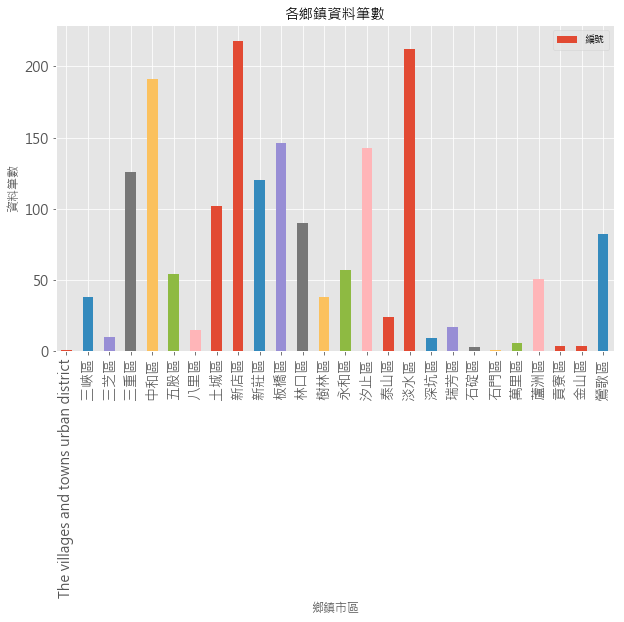

In [5]:
# 圖示各鄉鎮資料筆數
ax = df.groupby('鄉鎮市區').count().plot(kind='bar',y='編號',figsize=(10,6),fontsize=14,title='各鄉鎮資料筆數')
ax.set_ylabel('資料筆數')

In [6]:
df.groupby('鄉鎮市區').mean()   # 以鄉鎮市區進行聚合, 可查看所有鄉鎮市區資料

DataError: No numeric types to aggregate

In [ ]:
df.groupby('鄉鎮市區').mean()   # 以鄉鎮市區進行聚合, 可查看所有鄉鎮市區資料